## Open Machine Learning Course | Week 2 | Visual Data Analysis

This solution belongs to Assignment#2 of [Open Machine Learning Course](https://mlcourse.ai).\
Video link of the Lecture#2: <https://www.youtube.com/watch?v=WNoQTNOME5g>\
Link of the Assignment#2: <https://www.kaggle.com/kashnitsky/topic-2-practice-visualization>

In [19]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
dataset_url ='https://raw.githubusercontent.com/ufukeskici/datasets/main/titanic/train.csv'

In [13]:
df = pd.read_csv(dataset_url, index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Ticket    712 non-null    object 
 8   Fare      712 non-null    float64
 9   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


#### Let's drop Cabin, and then – all rows with missing values.

In [16]:
df = df.drop('Cabin', axis=1).dropna()

In [18]:
df.shape

(712, 10)

#### 1. Build a picture to visualize all scatter plots for each pair of features Age, Fare, SibSp, Parch and Survived. (scatter_matrix from Pandas or pairplot from Seaborn)

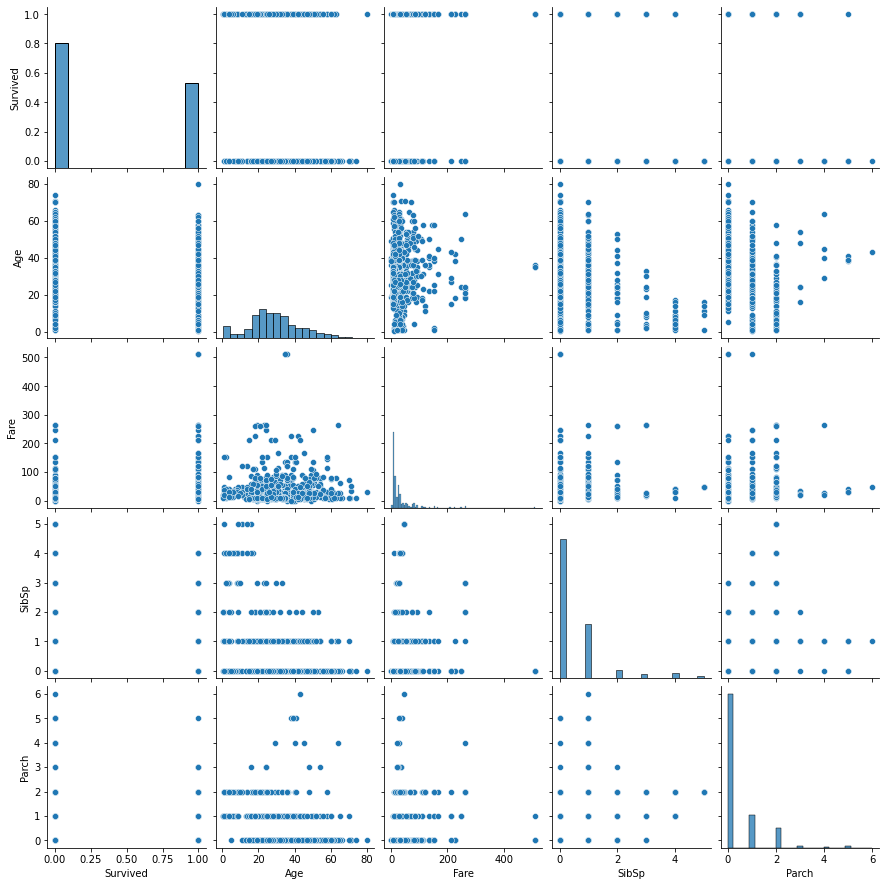

In [25]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']]);

#### 2. How does ticket price (Fare) depend on Pclass? Build a boxplot.

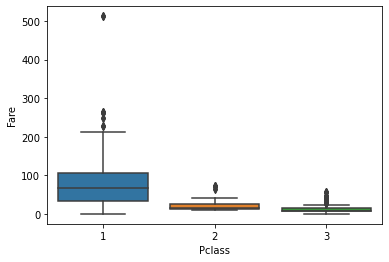

In [31]:
sns.boxplot(x='Pclass', y='Fare', data=df);

#### 3. Let's build the same plot but restricting values of Fare to be less than 95% quantile of the initial vector (to drop outliers that make the plot less clear).

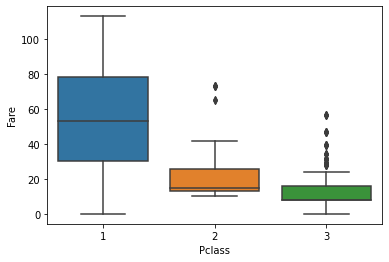

In [33]:
sns.boxplot(x='Pclass', y='Fare', data=df[df['Fare'] < df['Fare'].quantile(0.95)]);

#### 4. How the percentage of survived passengers is dependent on passengers' gender? Depict it with Seaborn.countplot using the hue argument.

<AxesSubplot:xlabel='Sex', ylabel='count'>

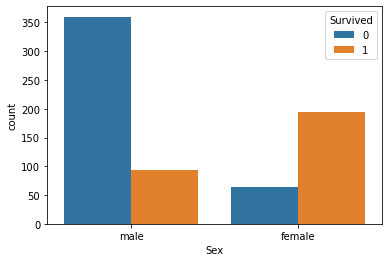

In [36]:
sns.countplot(x='Sex', hue='Survived', data=df)

#### 5. How does the distibution of ticket prices differ for those who survived and those who didn't. Depict it with Seaborn.boxplot

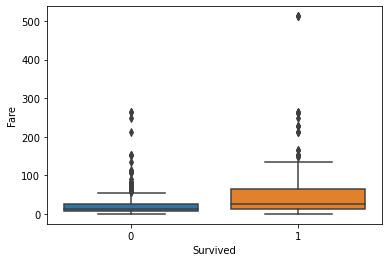

In [39]:
sns.boxplot(x='Survived', y='Fare', data=df); 

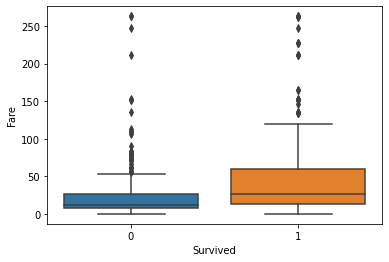

In [40]:
# There is an outlier around 500, so we can avoid it.
sns.boxplot(x='Survived', y='Fare', data=df[df['Fare'] < 500]); 

#### 6. How survival depended on passengers' age? Verify (graphically) an assumption that youngsters (< 30 y.o.) survived more frequently than old people (> 55 y.o.).

In [56]:
def f(row):
    if row['Age'] < 30:
        val = 'young'
    elif 30 <= row['Age'] <= 55:
        val = 'middle'
    elif row['Age'] > 55:
        val = 'old'
    return val

In [58]:
df['age_category'] = df.apply(f, axis=1) # created age_catogory column to classify the passesngers according to their age

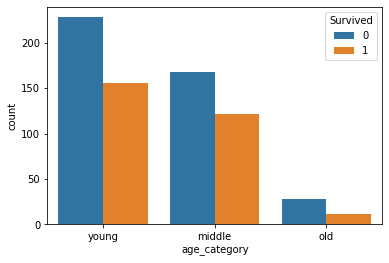

In [60]:
sns.countplot(x='age_category', hue='Survived', data=df);